In [62]:
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import linear_model
%matplotlib inline

In [63]:
train  = pd.read_csv("C://Users//USER//Desktop//ad_org_train.csv")

In [64]:
(train.shape)

(14999, 9)

In [65]:
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
vidid        14999 non-null object
adview       14999 non-null int64
views        14999 non-null object
likes        14999 non-null object
dislikes     14999 non-null object
comment      14999 non-null object
published    14999 non-null object
duration     14999 non-null object
category     14999 non-null object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [67]:
train.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [68]:
train.duplicated().sum() #checking for duplicates

0

In [69]:
print(train.isnull().sum()) #checking for missing values

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64


In [70]:
train.dtypes # check for data types

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [71]:
train['published'] = pd.to_datetime(train.published)
train.dtypes 
# changing it into appropriate data type

vidid                object
adview                int64
views                object
likes                object
dislikes             object
comment              object
published    datetime64[ns]
duration             object
category             object
dtype: object

In [72]:
train['duration'] = train.duration.str.replace('P','')

In [73]:
train['duration'] = train.duration.str.replace('T','')

In [74]:
train['duration'] = pd.to_timedelta(train['duration'])

In [75]:
print(train.views.str.contains('F').sum())

2


In [76]:
train = train[train.views != 'F']

In [77]:
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,00:07:37,F
1,VID_14135,2,1707,56,2,6,2016-01-10,00:09:30,D
2,VID_2187,1,2023,25,0,2,2016-02-07,00:02:16,C
3,VID_23096,6,620860,777,161,153,2016-07-27,00:04:22,H
4,VID_10175,1,666,1,0,0,2016-06-29,00:00:31,D


In [78]:
train['views'] = train.views.astype(int)

In [79]:
# Likes

In [80]:
train = train[train.likes != 'F']
train['likes'] = train.likes.astype(int)

In [81]:
#Dislikes  

In [82]:
train = train[train.dislikes != 'F']
train['dislikes'] = train.dislikes.astype(int)

In [83]:
#Comment

In [84]:
train = train[train.comment != 'F']
train['comment'] = train.comment.astype(int)

In [85]:
from pandas.plotting import scatter_matrix

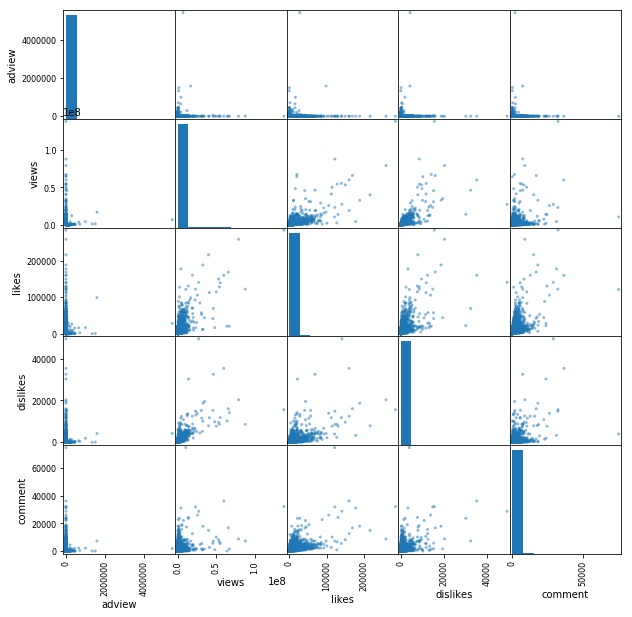

In [114]:
scatter_matrix = pd.plotting.scatter_matrix(train, figsize  = [10, 10])
plt.show()

In [115]:
# CATEGORY

In [116]:
count = train.category.value_counts(ascending = False)
#printing top 5 values
count.head()

D    7383
G    2473
E    1597
B     970
F     879
Name: category, dtype: int64

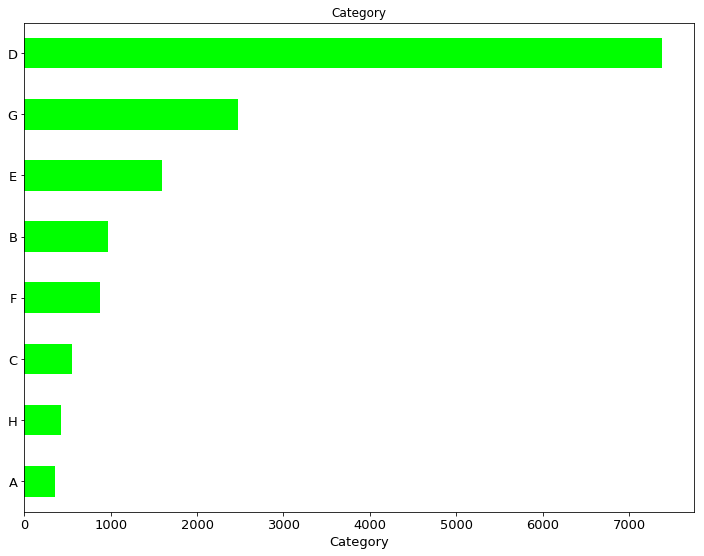

In [89]:
#catrgory_plt = ad_train.hist(column='category')
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Category')

# on x axis
lt.set_xlabel('Category', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

In [90]:
# duration

In [91]:
def profit_avg(column):
    return ad_train[column].mean()
print(profit_avg('duration'))

0 days 00:17:20.179066


In [92]:
keep_columns = ['views','likes','dislikes','comment']
corr_matrix = ad_train[keep_columns].corr()
corr_matrix

,views,likes,dislikes,comment
views,1.000000,0.726716,0.730320,0.410662
likes,0.726716,1.000000,0.648876,0.651202
dislikes,0.730320,0.648876,1.000000,0.532548
comment,0.410662,0.651202,0.532548,1.000000


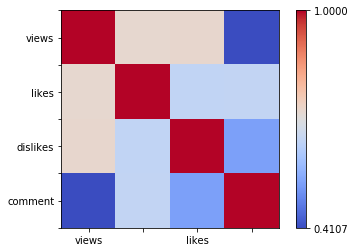

In [93]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

In [94]:
# Test Data Set  

In [95]:
test = pd.read_csv("C://Users//USER//Desktop//ad_org_test.csv")

In [96]:
test.shape

(8764, 8)

In [97]:
test =test[test.views != 'F']
test['views'] = test.views.astype(int)

In [98]:
test.dtypes

vidid        object
views         int32
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [99]:
# Linear Regression

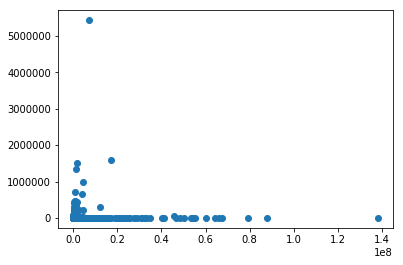

In [100]:
plt.scatter(train.views, train.adview)

In [101]:
reg = linear_model.LinearRegression()
reg.fit(train[['views']], train.adview)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
reg.predict([[43118]])

array([1642.12590346])

In [103]:
adview = reg.predict(test[['views']])

In [104]:
test['adview'] = adview

In [105]:
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category,adview
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,B,1894.091418
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,F,2274.713398
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,D,1632.872617
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,G,2450.200349
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,B,2815.952607


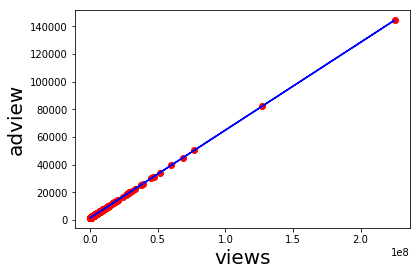

In [106]:
plt.xlabel('views', fontsize = 20)
plt.ylabel('adview', fontsize = 20)
plt.scatter(test.views, test.adview, color='red')
plt.plot(test.views, reg.predict(test[['views']]), color = 'blue')

In [108]:
test.to_csv("ad_new.csv")